# Perturbation Analysis in Brightway2

**Sarah Schmidt & David Laner**  
Center for Resource Management and Solid Waste Engineering  
University of Kassel - Faculty for Civil and Environmental Engineering  

*July 2022*

Perturbation analyses serve to assess the influence of parameter changes on LCA scores (Clavreul et al. 2012) and enable to identify key factors for the environmental performance of a product or a service. Perturbation analyses are applied by reproducing LCA calculations for an incremental increase of each parameter individually (“one-at-a-time-approach”), while all other parameters remain unaffected. The results of the perturbation analysis are evaluated by means of the sensitivity coefficient SC (cf. Equation 1) and sensitivity ratio (cf. Equation 2) which are calculated as the ratio between (relative) changes of LCA results and (relative) changes of parameter values compared to the initial system (Clavreul et al. 2012, Bisinella et al. 2016). For example, a sensitivity ratio of 0.5 implies that an increase of the parameter value by 10% results in an increase of LCA scores by 5%.

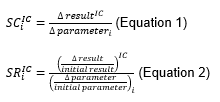

The purpose of this notebook is to demonstrate the functionality of the “perturbation analysis” module based on a simple, stylized case study. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Case-study" data-toc-modified-id="Case-study-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Case study</a></span><ul class="toc-item"><li><span><a href="#LCA" data-toc-modified-id="LCA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LCA</a></span><ul class="toc-item"><li><span><a href="#Functional-Unit" data-toc-modified-id="Functional-Unit-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Functional Unit</a></span></li><li><span><a href="#LCIA-Methods" data-toc-modified-id="LCIA-Methods-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>LCIA Methods</a></span></li><li><span><a href="#Calculation" data-toc-modified-id="Calculation-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Calculation</a></span></li></ul></li></ul></li><li><span><a href="#Perturbation-Analysis" data-toc-modified-id="Perturbation-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perturbation Analysis</a></span><ul class="toc-item"><li><span><a href="#Select-parameters-to-be-considered-in-the-perturbation-analysis" data-toc-modified-id="Select-parameters-to-be-considered-in-the-perturbation-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Select parameters to be considered in the perturbation analysis</a></span><ul class="toc-item"><li><span><a href="#All-exchanges-of-selected-activies" data-toc-modified-id="All-exchanges-of-selected-activies-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>All exchanges of selected activies</a></span></li><li><span><a href="#All-exchanges-in-a-selected-part-of-the-supply-chain" data-toc-modified-id="All-exchanges-in-a-selected-part-of-the-supply-chain-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>All exchanges in a selected part of the supply chain</a></span></li><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Check for duplicates</a></span></li><li><span><a href="#Check-for-loops" data-toc-modified-id="Check-for-loops-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Check for loops</a></span></li></ul></li><li><span><a href="#Prepare-Input-Data" data-toc-modified-id="Prepare-Input-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Prepare Input Data</a></span><ul class="toc-item"><li><span><a href="#Categorization-by-Location-of-Exchange-Inputs" data-toc-modified-id="Categorization-by-Location-of-Exchange-Inputs-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Categorization by Location of Exchange Inputs</a></span></li><li><span><a href="#Categorization-by-Key-Words-in-Exchange-Input-Names" data-toc-modified-id="Categorization-by-Key-Words-in-Exchange-Input-Names-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Categorization by Key Words in Exchange Input Names</a></span></li></ul></li><li><span><a href="#Perform-Perturbation-Analysis" data-toc-modified-id="Perform-Perturbation-Analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Perform Perturbation Analysis</a></span></li><li><span><a href="#Calculate-Sensitivity-Indicators" data-toc-modified-id="Calculate-Sensitivity-Indicators-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Calculate Sensitivity Indicators</a></span><ul class="toc-item"><li><span><a href="#Sensitivity-Coefficient-SC" data-toc-modified-id="Sensitivity-Coefficient-SC-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Sensitivity Coefficient SC</a></span></li><li><span><a href="#Sensitivity-Ratio-SR" data-toc-modified-id="Sensitivity-Ratio-SR-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Sensitivity Ratio SR</a></span></li></ul></li><li><span><a href="#Illustrate-Results" data-toc-modified-id="Illustrate-Results-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Illustrate Results</a></span><ul class="toc-item"><li><span><a href="#Small-number-of-parameters" data-toc-modified-id="Small-number-of-parameters-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Small number of parameters</a></span></li><li><span><a href="#Large-number-of-parameters" data-toc-modified-id="Large-number-of-parameters-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Large number of parameters</a></span></li></ul></li></ul></li></ul></div>

## Setup

In [1]:
import pandas as pd
import brightway2 as bw
from brightway2 import *
from bw2data.parameters import ActivityParameter, DatabaseParameter, ProjectParameter, Group
import perturbation_analysis as pa

In [2]:
projects.set_current("Perturbation_Analysis") #a new project will be created if it does not exist already

In [3]:
pd.set_option('display.max_rows', 10)

**Import LCIA methods and elementary flows**

In [4]:
bw.bw2setup() #creates the database "biosphere 3"

Biosphere database already present!!! No setup is needed


In [5]:
biosphere=bw.Database('biosphere3')

**Import of ecoinvent**

In [6]:
if 'ecoinvent 3.7.1_cutoff_ecoSpold02' in bw.databases:
    print("Database has already been imported.")
    ei371 = bw.Database('ecoinvent 3.7.1_cutoff_ecoSpold02')
else:
    # mind that the ecoinvent file must be unzipped; then: path to the datasets subfolder
    fpei371cut = r"C:\Users\SarahSchmidt\Desktop\ecoinvent\ecoinvent 3.7.1_cutoff_ecoSpold02\datasets"
    # the "r" makes sure that the path is read as a string - especially useful when you have spaces in your string
    ei371cut = bw.SingleOutputEcospold2Importer(fpei371cut, 'ecoinvent 3.7.1_cutoff_ecoSpold02')
    ei371cut
    ei371cut.apply_strategies()
    ei371cut.statistics()
    ei371=ei371cut.write_database()

Database has already been imported.


## Case study

An activity is created and exchanges are added to this activity.

In [7]:
try:
    baking_banana_bread = [act for act in ei371 if 'bakingbananabread' == act['code']][0]
    print("Activity is already existing.")
except IndexError:
    baking_banana_bread = ei371.new_activity(code = 'bakingbananabread', name = "baking banana bread", unit = "unit", loc="DE")
    baking_banana_bread.save()

Activity is already existing.


In [8]:
baking_banana_bread.exchanges().delete()

baking_banana_bread.new_exchange(input=baking_banana_bread.key,amount=1,unit="unit",type='production').save() 
baking_banana_bread.save()

#ingredients imported from Sri Lanka
bananas = [act for act in ei371 if act['name']=='banana production' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=bananas.key,amount=0.4,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

coconut_oil = [act for act in ei371 if act['name']=='coconut oil production, crude' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=coconut_oil.key,amount=0.9*0.075,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

transport_LKA_GE = [act for act in ei371 if act['name']=='transport, freight, sea, container ship' and 'GLO' in act['location']][0]
baking_banana_bread.new_exchange(input=transport_LKA_GE.key,amount=0.001*(0.4+0.075*0.9)*8000,unit="ton kilometer",type='technosphere').save()
baking_banana_bread.save()


#ingredients imported from California
almonds = [act for act in ei371 if act['name']=='almond production' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=almonds.key,amount=0.05,unit="kilogram",type='technosphere').save()
baking_banana_bread.save()

transport_CA_GE = [act for act in ei371 if act['name']=='transport, freight, aircraft, belly-freight, long haul' and 'GLO' in act['location']][0]
baking_banana_bread.new_exchange(input=transport_CA_GE.key,amount=0.001*0.05*9000,unit="ton kilometer",type='technosphere').save()
baking_banana_bread.save()


# ingredients from Germany
flour = [act for act in ei371 if act['name']=='market for wheat flour' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=flour.key,amount=0.245,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

sugar = [act for act in ei371 if act['name']=='sugar beet production' and 'DE' in act['location']][0]
baking_banana_bread.new_exchange(input=sugar.key,amount=0.075,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

milk = [act for act in ei371 if act['name']=='milk production, from cow' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=milk.key,amount=0.06,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

baking_powder = [act for act in ei371 if act['name']=='ammonium carbonate production' and 'RoW' in act['location']][0]
baking_banana_bread.new_exchange(input=baking_powder.key,amount=0.005,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

salt = [act for act in ei371 if act['name']=='salt production from seawater, evaporation pond' and 'GLO' in act['location']][0]
baking_banana_bread.new_exchange(input=salt.key,amount=0.003,unit="kilogram",type='technosphere').save() 
baking_banana_bread.save()

transport_GE = [act for act in ei371 if act['name']=='market for transport, freight, lorry 16-32 metric ton, EURO5' and 'RER' in act['location']][0]
baking_banana_bread.new_exchange(input=transport_GE.key,amount=0.001*(0.245+0.075+0.06+0.005+0.003)*50,unit="ton kilometer",type='technosphere').save() 
baking_banana_bread.save()


#electricity for baking
electricity = [act for act in ei371 if act['name']=='market for electricity, medium voltage' and 'DE' in act['location']][0]
baking_banana_bread.new_exchange(input=electricity.key,amount=1,unit="kilowatt hour",type='technosphere').save()
baking_banana_bread.save()

### LCA

#### Functional Unit

In [9]:
functional_unit = {baking_banana_bread:1}
functional_unit

{'baking banana bread' (unit, GLO, None): 1}

#### LCIA Methods

In [10]:
import LCIA_methods_JRC_38

In [11]:
LCIA_methods=LCIA_methods_JRC_38.LCIA_methods #list containing 16 LCIA methods recommended by JRC
#LCIA_methods

In [12]:
LCIA_method_names=LCIA_methods_JRC_38.LCIA_method_names # short names of the impact categories assessed 
                                                        # by each of the methods

In [13]:
units =[bw.methods.get(method)['unit'] for method in LCIA_methods]

#### Calculation

In [14]:
bw.calculation_setups['multiLCA'] = {'inv': [functional_unit], 'ia': LCIA_methods}

In [15]:
baking_banana_bread_MultiLCA = bw.MultiLCA('multiLCA')

In [16]:
df_impact = pd.DataFrame(data = baking_banana_bread_MultiLCA.results.transpose(), index = LCIA_methods_JRC_38.LCIA_method_names,
                        columns=['baking banana bread'])
df_impact['unit']=units
df_impact

,baking banana bread,unit
GW,1.951724e+00,kg CO2-Eq
OD,1.141967e-07,kg CFC-11-Eq
HTc,5.377118e-08,CTUh
HTnc,4.181929e-06,CTUh
PM,1.166042e-07,disease incidence
...,...,...
ET,1.214091e+01,CTU
LU,5.495187e+02,points
RDw,1.580517e+01,m3 water-Eq
RDm,9.743430e-06,kg Sb-Eq


## Perturbation Analysis

### Select parameters to be considered in the perturbation analysis

#### All exchanges of selected activies

The function *"select_parameters_by_activity_list"* takes a list with activities as an input and returns a list with all input exchanges of the named activities. This function might be applied if for example all exchanges in the foreground system shall be considered in the perturbation analysis.

* **arguments:**  
   * activity_list: list of activities to be considered
   * exc_type: "technosphere", "biosphere" or "all" (default: all)
       
* **returns:** list of all exchanges of the activities included in the activity list matching the given exchange type

In [17]:
param_list=pa.select_parameters_by_activity_list([baking_banana_bread])
param_list

[Exchange: 0.4 kilogram 'banana production' (kilogram, RoW, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.0675 kilogram 'coconut oil production, crude' (kilogram, RoW, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 3.74 ton kilometer 'transport, freight, sea, container ship' (ton kilometer, GLO, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.05 kilogram 'almond production' (kilogram, RoW, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.45 ton kilometer 'transport, freight, aircraft, belly-freight, long haul' (ton kilometer, GLO, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.245 kilogram 'market for wheat flour' (kilogram, RoW, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.075 kilogram 'sugar beet production' (kilogram, DE, None) to 'baking banana bread' (unit, GLO, None)>,
 Exchange: 0.06 kilogram 'milk production, from cow' (kilogram, RoW, None) to 'baking banana bread' (unit, GLO, No

#### All exchanges in a selected part of the supply chain

The function *select_parameters_by_supply_chain_level* can be applied in case exchanges that are part of a defined level of the supply chain shall be considered in the perturbation analysis. 

* **arguments:**  
   * activity_list: activity
   * max_level: maximum level of supply chain to be analyzed
       
* **returns:** list of all exchanges of the activities that are part of the selected section of the supply chain

In [18]:
param_list_2=pa.select_parameters_by_supply_chain_level(baking_banana_bread,max_level=2)
len(param_list_2)

823

#### Check for duplicates

The parameter list must not contain duplicates in terms of exchanges with identical input and output activies that can only be distinguished by the amount. Duplicates have to be removed from the list. This can either be done by condensing these exchanges or by excluding them from the perturbation analysis. 

In [19]:
pa.check_for_duplicates(param_list_2) #prints duplicates if existing

#### Check for loops

In [20]:
# prints exchanges starting and ending at the same activity
# if remove == True: exchanges starting and ending at the same activity are removed from the parameter list
param_list_2=pa.check_for_loops(param_list_2, remove=True) 

Exchange: 0.00265815405366773 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, DE, None) to 'market for electricity, medium voltage' (kilowatt hour, DE, None)>


### Prepare Input Data

*parameters_to_dataframe* creates a DataFrame that will be used as an input for performing the perturbation analysis. The exchanges considered in the DataFrame can be categorized by key words in activity names or exchange input names, by exchange types or by exchange input locations.

* **arguments:**  
   * parameter_list: list of exchanges to be considered
   * category_type: None, "activity", "input", "location" or "type" (default: None)
   * category_dict: A dictionary assigning categories (values) to key words (keys). Needs to be defined in case *category_type* is "activity", "input" or "location". (default: None)
       
* **returns:** list of all exchanges of the activities included in the activity list matching the given exchange type

#### Categorization by Location of Exchange Inputs

In [21]:
perturb_input=pa.parameters_to_dataframe(param_list,category_type='location',
                                    category_dict={'RoW':'imported','GLO':'imported','RER':'imported','DE':'local'})
perturb_input

,from,from - code,from - location,to,to - code,type,category,default amount,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,run10,run11
0,banana production,92e64f27d7f015e878d4ef2976742738,RoW,baking banana bread,bakingbananabread,technosphere,imported,0.4000,0.4400,0.40000,0.4000,0.4000,0.4000,0.4000,0.4000,0.4000,0.4000,0.4000,0.40000,0.4000
1,"coconut oil production, crude",e7e518b52017a50bbbbac1098c11f5f5,RoW,baking banana bread,bakingbananabread,technosphere,imported,0.0675,0.0675,0.07425,0.0675,0.0675,0.0675,0.0675,0.0675,0.0675,0.0675,0.0675,0.06750,0.0675
2,"transport, freight, sea, container ship",b7f36fd38fb9f8ab7ec687bd658b36aa,GLO,baking banana bread,bakingbananabread,technosphere,imported,3.7400,3.7400,3.74000,4.1140,3.7400,3.7400,3.7400,3.7400,3.7400,3.7400,3.7400,3.74000,3.7400
3,almond production,a9b66be975b737b12705f3366d31bd1e,RoW,baking banana bread,bakingbananabread,technosphere,imported,0.0500,0.0500,0.05000,0.0500,0.0550,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.05000,0.0500
4,"transport, freight, aircraft, belly-freight, l...",034bbdcaaf672de1e7a1fe4c26372892,GLO,baking banana bread,bakingbananabread,technosphere,imported,0.4500,0.4500,0.45000,0.4500,0.4500,0.4950,0.4500,0.4500,0.4500,0.4500,0.4500,0.45000,0.4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,"milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,RoW,baking banana bread,bakingbananabread,technosphere,imported,0.0600,0.0600,0.06000,0.0600,0.0600,0.0600,0.0600,0.0600,0.0660,0.0600,0.0600,0.06000,0.0600
8,ammonium carbonate production,6b71ff189f73e7c5db8f43df84354641,RoW,baking banana bread,bakingbananabread,technosphere,imported,0.0050,0.0050,0.00500,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0055,0.0050,0.00500,0.0050
9,"salt production from seawater, evaporation pond",845aac68817ec25b85464aef8b7b86ac,GLO,baking banana bread,bakingbananabread,technosphere,imported,0.0030,0.0030,0.00300,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0033,0.00300,0.0030
10,"market for transport, freight, lorry 16-32 met...",8ceab4319b3eb21ad7adb89accd4465b,RER,baking banana bread,bakingbananabread,technosphere,imported,0.0194,0.0194,0.01940,0.0194,0.0194,0.0194,0.0194,0.0194,0.0194,0.0194,0.0194,0.02134,0.0194


#### Categorization by Key Words in Exchange Input Names

In [22]:
perturb_input_2=pa.parameters_to_dataframe(param_list_2,category_type='input',
                                           category_dict={'transport':'transport', 
                                                          'fertiliser':'fertiliser', 
                                                          'electricity':'electricity'})
perturb_input_2

,from,from - code,from - location,to,to - code,type,category,default amount,run0,run1,...,run812,run813,run814,run815,run816,run817,run818,run819,run820,run821
0,banana production,92e64f27d7f015e878d4ef2976742738,RoW,baking banana bread,bakingbananabread,technosphere,others,4.000000e-01,4.400000e-01,4.000000e-01,...,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01
1,"market for poultry manure, dried",4887ac7b45b04f1f2f259bd1adb70f63,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,1.630239e-03,1.630239e-03,1.793263e-03,...,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03,1.630239e-03
2,"market for diesel, burned in agricultural mach...",227b698bdbe0cfd3f0230d7315df273f,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,2.859762e-02,2.859762e-02,2.859762e-02,...,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02,2.859762e-02
3,market for potassium sulfate,f84d5bbc788f3f2d8e505a5d77464172,RER,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,1.085049e-03,1.085049e-03,1.085049e-03,...,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03,1.085049e-03
4,market for application of plant protection pro...,82e699bad21c2bc5ab1b0851349dae35,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,1.202709e-04,1.202709e-04,1.202709e-04,...,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04,1.202709e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,"market for sulfur hexafluoride, liquid",5f2580f7d4e2d2df13adb9f31b85b354,RER,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,others,1.130000e-07,1.130000e-07,1.130000e-07,...,1.130000e-07,1.130000e-07,1.130000e-07,1.130000e-07,1.130000e-07,1.243000e-07,1.130000e-07,1.130000e-07,1.130000e-07,1.130000e-07
818,"market for transmission network, electricity, ...",6bd8d314105d5011025136b680d07845,GLO,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,electricity,1.862777e-08,1.862777e-08,1.862777e-08,...,1.862777e-08,1.862777e-08,1.862777e-08,1.862777e-08,1.862777e-08,1.862777e-08,2.049054e-08,1.862777e-08,1.862777e-08,1.862777e-08
819,electricity voltage transformation from high t...,314b80f8f4f0bb03c1d0aad5cdda8dfa,DE,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,electricity,9.739410e-01,9.739410e-01,9.739410e-01,...,9.739410e-01,9.739410e-01,9.739410e-01,9.739410e-01,9.739410e-01,9.739410e-01,9.739410e-01,1.071335e+00,9.739410e-01,9.739410e-01
820,"electricity, from municipal waste incineration...",1d85d27ee225f9448286cff38de7cb1f,DE,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,electricity,2.605896e-02,2.605896e-02,2.605896e-02,...,2.605896e-02,2.605896e-02,2.605896e-02,2.605896e-02,2.605896e-02,2.605896e-02,2.605896e-02,2.605896e-02,2.866485e-02,2.605896e-02


In [23]:
perturb_input_2['category'].value_counts()

others         460
fertiliser     221
electricity    117
transport       24
Name: category, dtype: int64

### Perform Perturbation Analysis

* **arguments:**  
   * functional unit: {activity : amount}
   * LCIA methods: list containing at least one bw.methods-item
   * perturb_input: dataframe containing input data for the perturbation analysis (output of the function *parameters_to_dataframe*)
   * database_name: name of the database used
       
* **returns:** 
    * results of the reproduced LCA calculations for an incremental increase of each parameter individually (columns: methods, indices: runs of the LCA calculation ("default" refers to the default LCA results, "run-i" refers to the reproduced calculation for an incremental increase of parameter i --> cf. index in *perturb_input*)

The caluclation is performed using *presamples*. (cf. https://presamples.readthedocs.io/en/latest/use_with_bw2.html, Lesage et al. 2018: https://doi.org/10.1007/s11367-018-1444-x)

In [24]:
results=pa.perform_perturbation_analysis(functional_unit,LCIA_methods,perturb_input,'ecoinvent 3.7.1_cutoff_ecoSpold02')
results

--- 11.2 seconds ---


,"('EF v2.0 2018 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')","('EF v2.0 2018 no LT', 'ozone depletion no LT', 'ozone depletion potential (ODP) no LT')","('EF v2.0 2018 no LT', 'human toxicity: carcinogenic no LT', 'comparative toxic unit for human (CTUh) no LT')","('EF v2.0 2018 no LT', 'human toxicity: non-carcinogenic no LT', 'comparative toxic unit for human (CTUh) no LT')","('EF v2.0 2018 no LT', 'particulate matter formation no LT', 'impact on human health no LT')","('EF v2.0 2018 no LT', 'ionising radiation: human health no LT', 'human exposure efficiency relative to u235 no LT')","('EF v2.0 2018 no LT', 'photochemical ozone formation: human health no LT', 'tropospheric ozone concentration increase no LT')","('EF v2.0 2018 no LT', 'acidification no LT', 'accumulated exceedance (ae) no LT')","('EF v2.0 2018 no LT', 'eutrophication: terrestrial no LT', 'accumulated exceedance (AE) no LT')","('EF v2.0 2018 no LT', 'eutrophication: freshwater no LT', 'fraction of nutrients reaching freshwater end compartment (P) no LT')","('EF v2.0 2018 no LT', 'eutrophication: marine no LT', 'fraction of nutrients reaching marine end compartment (N) no LT')","('EF v2.0 2018 no LT', 'ecotoxicity: freshwater no LT', 'comparative toxic unit for ecosystems (CTUe) no LT')","('EF v2.0 2018 no LT', 'land use no LT', 'soil quality index no LT')","('EF v2.0 2018 no LT', 'water use no LT', 'user deprivation potential (deprivation-weighted water consumption) no LT')","('EF v2.0 2018 no LT', 'material resources: metals/minerals no LT', 'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')","('EF v2.0 2018 no LT', 'energy resources: non-renewable no LT', 'abiotic depletion potential (ADP): fossil fuels no LT')"
default,1.951724,1.141967e-07,5.377118e-08,0.000004,1.166042e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.140911,549.518718,15.805165,0.00001,19.263551
run0,1.957549,1.144547e-07,5.399381e-08,0.000004,1.172046e-07,0.056271,0.005881,0.018453,0.073153,0.000310,0.009948,12.145117,551.013162,16.087140,0.00001,19.303561
run1,1.969617,1.151037e-07,5.482169e-08,0.000004,1.186677e-07,0.056500,0.005947,0.018596,0.073739,0.000312,0.010121,12.641343,554.317806,15.946915,0.00001,19.384258
run2,1.955231,1.149033e-07,5.387544e-08,0.000004,1.167092e-07,0.056350,0.005946,0.018483,0.073110,0.000309,0.009888,12.142615,549.522145,15.805294,0.00001,19.308245
run3,1.959881,1.147476e-07,5.402981e-08,0.000005,1.174684e-07,0.056340,0.005901,0.018505,0.073352,0.000310,0.009919,12.659868,551.702828,16.285361,0.00001,19.340899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
run7,2.010353,1.157247e-07,5.506252e-08,0.000004,1.209890e-07,0.056847,0.005963,0.018977,0.075356,0.000315,0.010111,12.256409,585.227001,15.864227,0.00001,19.490871
run8,1.952833,1.142353e-07,5.379093e-08,0.000004,1.166492e-07,0.056171,0.005867,0.018373,0.072809,0.000309,0.009864,12.141431,549.523281,15.805914,0.00001,19.277168
run9,1.951724,1.141967e-07,5.377122e-08,0.000004,1.166042e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.140912,549.518719,16.160791,0.00001,19.263554
run10,1.952046,1.142698e-07,5.377751e-08,0.000004,1.166264e-07,0.056178,0.005866,0.018370,0.072801,0.000309,0.009860,12.141766,549.523621,15.805187,0.00001,19.268437


### Calculate Sensitivity Indicators

The results of the perturbation analysis are evaluated by means of the sensitivity coefficient SC (cf. Equation 1) and sensitivity ratio (cf. Equation 2) which are calculated as the ratio between (relative) changes of LCA results and (relative) changes of parameter values compared to the initial system (Clavreul et al. 2012, Bisinella et al. 2016). For example, a sensitivity ratio of 0.5 implies that an increase of the parameter value by 10% results in an increase of LCA scores by 5%.

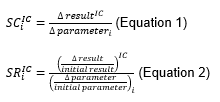

#### Sensitivity Coefficient SC

* **arguments:**  
   * LCIA methods: list containing at least on bw.methods-item
   * perturb_input: dataframe containing input data for the perturbation analysis (output of the function *parameters_to_dataframe*)
   * perturb_results: output of *perform_perturbation_analysis*
       
* **returns:** 
    * DataFrame containing sensitivity coefficients per parameter and impact category

In [25]:
sensitivity_coefficient_df=pa.calculate_sensitivity_coefficients(LCIA_methods,
                                                                 perturb_results=results,
                                                                 perturb_input=perturb_input)
sensitivity_coefficient_df

,from,from - code,from - location,to,to - code,type,category,"('EF v2.0 2018 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')","('EF v2.0 2018 no LT', 'ozone depletion no LT', 'ozone depletion potential (ODP) no LT')","('EF v2.0 2018 no LT', 'human toxicity: carcinogenic no LT', 'comparative toxic unit for human (CTUh) no LT')",...,"('EF v2.0 2018 no LT', 'photochemical ozone formation: human health no LT', 'tropospheric ozone concentration increase no LT')","('EF v2.0 2018 no LT', 'acidification no LT', 'accumulated exceedance (ae) no LT')","('EF v2.0 2018 no LT', 'eutrophication: terrestrial no LT', 'accumulated exceedance (AE) no LT')","('EF v2.0 2018 no LT', 'eutrophication: freshwater no LT', 'fraction of nutrients reaching freshwater end compartment (P) no LT')","('EF v2.0 2018 no LT', 'eutrophication: marine no LT', 'fraction of nutrients reaching marine end compartment (N) no LT')","('EF v2.0 2018 no LT', 'ecotoxicity: freshwater no LT', 'comparative toxic unit for ecosystems (CTUe) no LT')","('EF v2.0 2018 no LT', 'land use no LT', 'soil quality index no LT')","('EF v2.0 2018 no LT', 'water use no LT', 'user deprivation potential (deprivation-weighted water consumption) no LT')","('EF v2.0 2018 no LT', 'material resources: metals/minerals no LT', 'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')","('EF v2.0 2018 no LT', 'energy resources: non-renewable no LT', 'abiotic depletion potential (ADP): fossil fuels no LT')"
0,banana production,92e64f27d7f015e878d4ef2976742738,RoW,baking banana bread,bakingbananabread,technosphere,imported,0.145625,6.449492e-09,5.565785e-09,...,0.000397,0.002108,0.008890,2.797518e-05,2.197951e-03,0.105146,37.361082,7.049372,1.252273e-06,1.000235
1,"coconut oil production, crude",e7e518b52017a50bbbbac1098c11f5f5,RoW,baking banana bread,bakingbananabread,technosphere,imported,2.650816,1.343781e-07,1.556324e-07,...,0.012215,0.033777,0.139482,3.287796e-04,3.870891e-02,74.138095,710.975925,20.999985,2.684379e-05,17.882393
2,"transport, freight, sea, container ship",b7f36fd38fb9f8ab7ec687bd658b36aa,GLO,baking banana bread,bakingbananabread,technosphere,imported,0.009376,1.889323e-09,2.787740e-10,...,0.000216,0.000306,0.000836,3.369837e-08,7.523272e-05,0.004555,0.009163,0.000344,1.234585e-08,0.119503
3,almond production,a9b66be975b737b12705f3366d31bd1e,RoW,baking banana bread,bakingbananabread,technosphere,imported,1.631413,1.101876e-07,5.172759e-08,...,0.007262,0.027252,0.110964,1.529034e-04,1.181947e-02,103.791392,436.822011,96.039253,2.472105e-05,15.469436
4,"transport, freight, aircraft, belly-freight, l...",034bbdcaaf672de1e7a1fe4c26372892,GLO,baking banana bread,bakingbananabread,technosphere,imported,0.413180,9.373293e-08,1.275410e-09,...,0.002311,0.002213,0.008997,6.227778e-07,8.213537e-04,0.093773,0.256346,0.008163,9.288806e-08,5.724398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,"milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,RoW,baking banana bread,bakingbananabread,technosphere,imported,9.771476,2.546656e-07,2.152239e-07,...,0.016360,0.101423,0.426431,9.673781e-04,4.187629e-02,19.249532,5951.380360,9.843715,4.474164e-05,37.886573
8,ammonium carbonate production,6b71ff189f73e7c5db8f43df84354641,RoW,baking banana bread,bakingbananabread,technosphere,imported,2.217967,7.720671e-08,3.951310e-08,...,0.004322,0.009422,0.023529,6.079365e-05,8.720685e-03,1.038813,9.124390,1.498115,2.600561e-05,27.233006
9,"salt production from seawater, evaporation pond",845aac68817ec25b85464aef8b7b86ac,GLO,baking banana bread,bakingbananabread,technosphere,imported,0.000539,2.581238e-11,1.530276e-10,...,0.000002,0.000002,0.000005,2.823381e-08,4.734576e-07,0.001814,0.002348,1185.420210,5.540158e-09,0.008283
10,"market for transport, freight, lorry 16-32 met...",8ceab4319b3eb21ad7adb89accd4465b,RER,baking banana bread,bakingbananabread,technosphere,imported,0.166066,3.768511e-08,3.266459e-09,...,0.000678,0.

#### Sensitivity Ratio SR

* **arguments:**  
   * LCIA methods: list containing at least on bw.methods-item
   * perturb_input: dataframe containing input data for the perturbation analysis (output of the function *parameters_to_dataframe*)
   * perturb_results: output of *perform_perturbation_analysis*
       
* **returns:** 
    * DataFrame containing sensitivity ratios per parameter and impact category

In [26]:
sensitivity_ratio_df=pa.calculate_sensitivity_ratios(LCIA_methods,perturb_results=results, perturb_input=perturb_input)
sensitivity_ratio_df

,from,from - code,from - location,to,to - code,type,category,"('EF v2.0 2018 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')","('EF v2.0 2018 no LT', 'ozone depletion no LT', 'ozone depletion potential (ODP) no LT')","('EF v2.0 2018 no LT', 'human toxicity: carcinogenic no LT', 'comparative toxic unit for human (CTUh) no LT')",...,"('EF v2.0 2018 no LT', 'photochemical ozone formation: human health no LT', 'tropospheric ozone concentration increase no LT')","('EF v2.0 2018 no LT', 'acidification no LT', 'accumulated exceedance (ae) no LT')","('EF v2.0 2018 no LT', 'eutrophication: terrestrial no LT', 'accumulated exceedance (AE) no LT')","('EF v2.0 2018 no LT', 'eutrophication: freshwater no LT', 'fraction of nutrients reaching freshwater end compartment (P) no LT')","('EF v2.0 2018 no LT', 'eutrophication: marine no LT', 'fraction of nutrients reaching marine end compartment (N) no LT')","('EF v2.0 2018 no LT', 'ecotoxicity: freshwater no LT', 'comparative toxic unit for ecosystems (CTUe) no LT')","('EF v2.0 2018 no LT', 'land use no LT', 'soil quality index no LT')","('EF v2.0 2018 no LT', 'water use no LT', 'user deprivation potential (deprivation-weighted water consumption) no LT')","('EF v2.0 2018 no LT', 'material resources: metals/minerals no LT', 'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')","('EF v2.0 2018 no LT', 'energy resources: non-renewable no LT', 'abiotic depletion potential (ADP): fossil fuels no LT')"
0,banana production,92e64f27d7f015e878d4ef2976742738,RoW,baking banana bread,bakingbananabread,technosphere,imported,2.984533e-02,2.259082e-02,0.041403,...,2.706575e-02,4.589531e-02,4.885008e-02,3.617287e-02,8.916888e-02,3.464183e-03,2.719549e-02,0.178407,0.051410,0.020769
1,"coconut oil production, crude",e7e518b52017a50bbbbac1098c11f5f5,RoW,baking banana bread,bakingbananabread,technosphere,imported,9.167795e-02,7.942895e-02,0.195368,...,1.405806e-01,1.241247e-01,1.293329e-01,7.173957e-02,2.650026e-01,4.121866e-01,8.733256e-02,0.089686,0.185967,0.062660
2,"transport, freight, sea, container ship",b7f36fd38fb9f8ab7ec687bd658b36aa,GLO,baking banana bread,bakingbananabread,technosphere,imported,1.796610e-02,6.187630e-02,0.019390,...,1.379483e-01,6.223921e-02,4.295322e-02,4.074090e-04,2.853735e-02,1.403037e-03,6.236591e-05,0.000081,0.004739,0.023201
3,almond production,a9b66be975b737b12705f3366d31bd1e,RoW,baking banana bread,bakingbananabread,technosphere,imported,4.179415e-02,4.824466e-02,0.048100,...,6.191054e-02,7.418282e-02,7.621443e-02,2.471367e-02,5.993813e-02,4.274448e-01,3.974587e-02,0.303822,0.126860,0.040152
4,"transport, freight, aircraft, belly-freight, l...",034bbdcaaf672de1e7a1fe4c26372892,GLO,baking banana bread,bakingbananabread,technosphere,imported,9.526501e-02,3.693611e-01,0.010674,...,1.773095e-01,5.420808e-02,5.561715e-02,9.059324e-04,3.748677e-02,3.475675e-03,2.099211e-04,0.000232,0.004290,0.133723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,"milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,RoW,baking banana bread,bakingbananabread,technosphere,imported,3.003952e-01,1.338037e-01,0.240155,...,1.673730e-01,3.312978e-01,3.514685e-01,1.876280e-01,2.548325e-01,9.513058e-02,6.498101e-01,0.037369,0.275519,0.118005
8,ammonium carbonate production,6b71ff189f73e7c5db8f43df84354641,RoW,baking banana bread,bakingbananabread,technosphere,imported,5.682070e-03,3.380427e-03,0.003674,...,3.684341e-03,2.564871e-03,1.616045e-03,9.826037e-04,4.422378e-03,4.278149e-04,8.302165e-05,0.000474,0.013345,0.007069
9,"salt production from seawater, evaporation pond",845aac68817ec25b85464aef8b7b86ac,GLO,baking banana bread,bakingbananabread,technosphere,imported,8.287994e-07,6.781031e-07,0.000009,...,8.778686e-07,3.982120e-07,2.092165e-07,2.738047e-07,1.440581e-07,4.482523e-07,1.282119e-08,0.225006,0.000002,0.000001
10,"market for transport, freight, lorry 16-32 met...",8ceab4319b3eb21ad7adb89accd4465b,RER,bak

### Illustrate Results

#### Small number of parameters

If the sensitivity of LCA scores is assessed only for a small numbers of parameters, the results can be illustrated one by one:

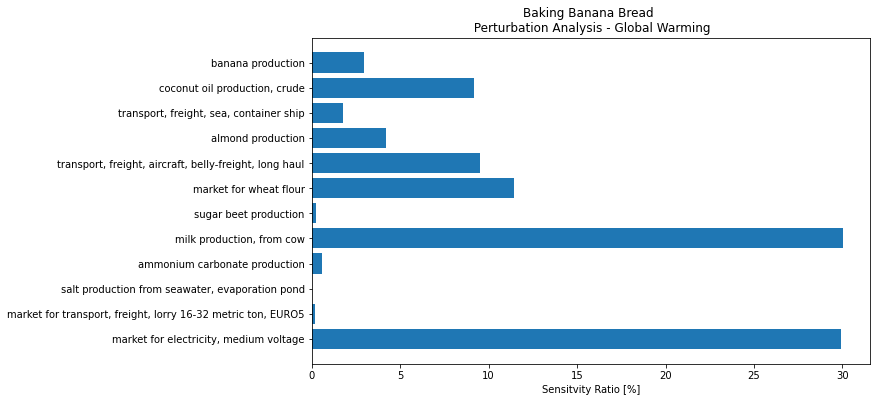

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.barh(y=[i for i in sensitivity_ratio_df.index],width=sensitivity_ratio_df[str(LCIA_methods[0])].values*100)
ax.set_yticks([i for i in sensitivity_ratio_df.index])
ax.set_yticklabels(sensitivity_ratio_df['from'])
ax.set_xlabel('Sensitvity Ratio [%]')
ax.set_title('Baking Banana Bread \n Perturbation Analysis - Global Warming')
ax.invert_yaxis()

fig.set_size_inches(10,6)

#### Large number of parameters

In [28]:
results_2=pa.perform_perturbation_analysis(functional_unit,LCIA_methods,perturb_input_2,'ecoinvent 3.7.1_cutoff_ecoSpold02')
results_2

--- 581.27 seconds ---


,"('EF v2.0 2018 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')","('EF v2.0 2018 no LT', 'ozone depletion no LT', 'ozone depletion potential (ODP) no LT')","('EF v2.0 2018 no LT', 'human toxicity: carcinogenic no LT', 'comparative toxic unit for human (CTUh) no LT')","('EF v2.0 2018 no LT', 'human toxicity: non-carcinogenic no LT', 'comparative toxic unit for human (CTUh) no LT')","('EF v2.0 2018 no LT', 'particulate matter formation no LT', 'impact on human health no LT')","('EF v2.0 2018 no LT', 'ionising radiation: human health no LT', 'human exposure efficiency relative to u235 no LT')","('EF v2.0 2018 no LT', 'photochemical ozone formation: human health no LT', 'tropospheric ozone concentration increase no LT')","('EF v2.0 2018 no LT', 'acidification no LT', 'accumulated exceedance (ae) no LT')","('EF v2.0 2018 no LT', 'eutrophication: terrestrial no LT', 'accumulated exceedance (AE) no LT')","('EF v2.0 2018 no LT', 'eutrophication: freshwater no LT', 'fraction of nutrients reaching freshwater end compartment (P) no LT')","('EF v2.0 2018 no LT', 'eutrophication: marine no LT', 'fraction of nutrients reaching marine end compartment (N) no LT')","('EF v2.0 2018 no LT', 'ecotoxicity: freshwater no LT', 'comparative toxic unit for ecosystems (CTUe) no LT')","('EF v2.0 2018 no LT', 'land use no LT', 'soil quality index no LT')","('EF v2.0 2018 no LT', 'water use no LT', 'user deprivation potential (deprivation-weighted water consumption) no LT')","('EF v2.0 2018 no LT', 'material resources: metals/minerals no LT', 'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')","('EF v2.0 2018 no LT', 'energy resources: non-renewable no LT', 'abiotic depletion potential (ADP): fossil fuels no LT')"
default,1.951724,1.141967e-07,5.377117e-08,0.000004,1.166042e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.140911,549.518710,15.805165,0.00001,19.263551
run0,1.957549,1.144547e-07,5.399381e-08,0.000004,1.172046e-07,0.056271,0.005881,0.018453,0.073153,0.000310,0.009948,12.145117,551.013153,16.087140,0.00001,19.303561
run1,1.951735,1.141971e-07,5.377131e-08,0.000004,1.166049e-07,0.056157,0.005865,0.018368,0.072797,0.000309,0.009860,12.140917,549.518803,15.805167,0.00001,19.263695
run2,1.951868,1.142204e-07,5.377622e-08,0.000004,1.166089e-07,0.056163,0.005866,0.018369,0.072802,0.000309,0.009860,12.141268,549.522133,15.805180,0.00001,19.265486
run3,1.951768,1.142023e-07,5.377377e-08,0.000004,1.166086e-07,0.056159,0.005865,0.018369,0.072798,0.000309,0.009860,12.140999,549.519617,15.805202,0.00001,19.264314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
run817,1.951726,1.141967e-07,5.377118e-08,0.000004,1.166042e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.140911,549.518710,15.805165,0.00001,19.263553
run818,1.951785,1.142003e-07,5.384046e-08,0.000004,1.166107e-07,0.056158,0.005865,0.018369,0.072799,0.000309,0.009860,12.142057,549.520784,15.805197,0.00001,19.264294
run819,2.010101,1.156656e-07,5.434839e-08,0.000004,1.169983e-07,0.058578,0.005937,0.018494,0.073090,0.000318,0.009883,12.153784,549.735288,15.814402,0.00001,20.227617
run820,1.951724,1.141967e-07,5.377117e-08,0.000004,1.166042e-07,0.056156,0.005865,0.018368,0.072797,0.000309,0.009860,12.140911,549.518710,15.805165,0.00001,19.263551


In [29]:
sensitivity_ratio_df_2=pa.calculate_sensitivity_ratios(LCIA_methods,
                                                       perturb_results=results_2, 
                                                       perturb_input=perturb_input_2)
sensitivity_ratio_df_2

,from,from - code,from - location,to,to - code,type,category,"('EF v2.0 2018 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')","('EF v2.0 2018 no LT', 'ozone depletion no LT', 'ozone depletion potential (ODP) no LT')","('EF v2.0 2018 no LT', 'human toxicity: carcinogenic no LT', 'comparative toxic unit for human (CTUh) no LT')",...,"('EF v2.0 2018 no LT', 'photochemical ozone formation: human health no LT', 'tropospheric ozone concentration increase no LT')","('EF v2.0 2018 no LT', 'acidification no LT', 'accumulated exceedance (ae) no LT')","('EF v2.0 2018 no LT', 'eutrophication: terrestrial no LT', 'accumulated exceedance (AE) no LT')","('EF v2.0 2018 no LT', 'eutrophication: freshwater no LT', 'fraction of nutrients reaching freshwater end compartment (P) no LT')","('EF v2.0 2018 no LT', 'eutrophication: marine no LT', 'fraction of nutrients reaching marine end compartment (N) no LT')","('EF v2.0 2018 no LT', 'ecotoxicity: freshwater no LT', 'comparative toxic unit for ecosystems (CTUe) no LT')","('EF v2.0 2018 no LT', 'land use no LT', 'soil quality index no LT')","('EF v2.0 2018 no LT', 'water use no LT', 'user deprivation potential (deprivation-weighted water consumption) no LT')","('EF v2.0 2018 no LT', 'material resources: metals/minerals no LT', 'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')","('EF v2.0 2018 no LT', 'energy resources: non-renewable no LT', 'abiotic depletion potential (ADP): fossil fuels no LT')"
0,banana production,92e64f27d7f015e878d4ef2976742738,RoW,baking banana bread,bakingbananabread,technosphere,others,0.029845,2.259082e-02,4.140348e-02,...,2.706575e-02,4.589531e-02,4.885007e-02,3.617287e-02,8.916888e-02,3.464183e-03,2.719549e-02,1.784068e-01,0.051410,2.076949e-02
1,"market for poultry manure, dried",4887ac7b45b04f1f2f259bd1adb70f63,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,0.000057,3.772974e-05,2.574635e-05,...,6.849983e-05,4.204109e-05,2.563337e-05,1.540792e-05,8.806324e-06,4.465180e-06,1.700190e-06,1.063061e-06,0.000034,7.461300e-05
2,"market for diesel, burned in agricultural mach...",227b698bdbe0cfd3f0230d7315df273f,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,0.000739,2.074780e-03,9.374307e-04,...,2.355705e-03,6.447973e-04,6.832037e-04,6.897240e-05,4.586970e-04,2.934605e-04,6.230028e-05,9.071524e-06,0.001631,1.004006e-03
3,market for potassium sulfate,f84d5bbc788f3f2d8e505a5d77464172,RER,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,0.000223,4.937893e-04,4.828374e-04,...,3.352078e-04,2.930875e-04,8.894325e-05,5.272527e-05,5.636327e-05,7.248031e-05,1.650365e-05,2.340147e-05,0.001956,3.956673e-04
4,market for application of plant protection pro...,82e699bad21c2bc5ab1b0851349dae35,GLO,banana production,92e64f27d7f015e878d4ef2976742738,technosphere,others,0.000050,1.390317e-04,7.502423e-05,...,1.687140e-04,4.413883e-05,4.897285e-05,4.758593e-06,3.282194e-05,1.072455e-05,1.416883e-05,6.078753e-07,0.000171,6.512723e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,"market for sulfur hexafluoride, liquid",5f2580f7d4e2d2df13adb9f31b85b354,RER,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,others,0.000008,3.743796e-07,3.305988e-07,...,3.387893e-07,3.659595e-07,8.935552e-08,2.117524e-07,5.776253e-08,4.755798e-08,9.411504e-09,3.333683e-08,0.000001,8.651041e-07
818,"market for transmission network, electricity, ...",6bd8d314105d5011025136b680d07845,GLO,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,technosphere,electricity,0.000313,3.137285e-04,1.288506e-02,...,7.161784e-04,4.527471e-04,2.515045e-04,3.405560e-04,1.336252e-04,9.438766e-04,3.775462e-05,1.993756e-05,0.057793,3.854116e-04
819,electricity voltage transformation from high t...,314b80f8f4f0bb03c1d0aad5cdda8dfa,DE,"market for electricity, medium voltage",d20464840573665d431297c62b3cab90,techn

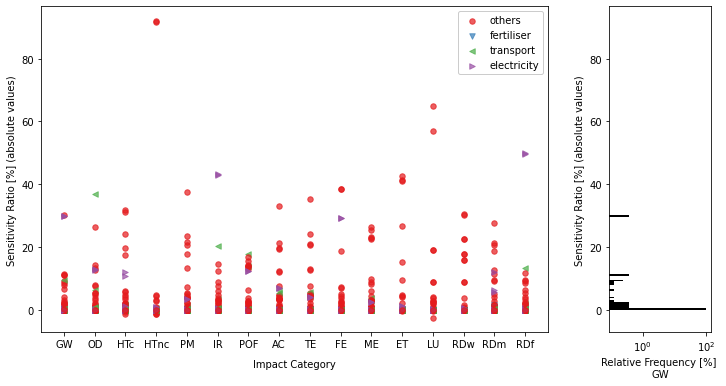

In [30]:
pa.plot_sensitivity_ratios_with_hist(sensitivity_ratio_df_2,LCIA_methods,LCIA_method_names=LCIA_method_names,hist_IC=0)

In [31]:
pa.top_sensitivity_ratios(sensitivity_ratio_df_2,top=2)

,from,from - code,from - location,to,to - code,type,category,"('EF v2.0 2018 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')","('EF v2.0 2018 no LT', 'ozone depletion no LT', 'ozone depletion potential (ODP) no LT')","('EF v2.0 2018 no LT', 'human toxicity: carcinogenic no LT', 'comparative toxic unit for human (CTUh) no LT')",...,"('EF v2.0 2018 no LT', 'photochemical ozone formation: human health no LT', 'tropospheric ozone concentration increase no LT')","('EF v2.0 2018 no LT', 'acidification no LT', 'accumulated exceedance (ae) no LT')","('EF v2.0 2018 no LT', 'eutrophication: terrestrial no LT', 'accumulated exceedance (AE) no LT')","('EF v2.0 2018 no LT', 'eutrophication: freshwater no LT', 'fraction of nutrients reaching freshwater end compartment (P) no LT')","('EF v2.0 2018 no LT', 'eutrophication: marine no LT', 'fraction of nutrients reaching marine end compartment (N) no LT')","('EF v2.0 2018 no LT', 'ecotoxicity: freshwater no LT', 'comparative toxic unit for ecosystems (CTUe) no LT')","('EF v2.0 2018 no LT', 'land use no LT', 'soil quality index no LT')","('EF v2.0 2018 no LT', 'water use no LT', 'user deprivation potential (deprivation-weighted water consumption) no LT')","('EF v2.0 2018 no LT', 'material resources: metals/minerals no LT', 'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')","('EF v2.0 2018 no LT', 'energy resources: non-renewable no LT', 'abiotic depletion potential (ADP): fossil fuels no LT')"
512,"wheat grain processing, dry milling",bfe319e9fff71ed8b7a9bf4794036971,RoW,market for wheat flour,72297801f1495a317939b37d37bf8a9e,technosphere,others,0.109278,0.126149,0.311451,...,0.143853,0.193774,0.206172,0.384442,0.226769,0.041793,0.189968,0.158504,0.207274,0.084732
771,Ammonia,0f440cc0-0f74-446d-99d6-8ff0e97a2444,biosphere,"milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,biosphere,others,0.000000,0.000000,0.000000,...,0.000000,0.213472,0.240247,0.000000,0.012115,0.000000,0.000000,0.000000,0.000000,0.000000
774,"Occupation, pasture, man made",59ded913-17fe-4b3e-80cb-79b97cdbef9a,biosphere,"milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,biosphere,others,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.569821,0.000000,0.000000,0.000000
616,"milk production, from cow",30983ca593f5379869b9b7e3f6ccbf65,RoW,baking banana bread,bakingbananabread,technosphere,others,0.300395,0.133804,0.240155,...,0.167373,0.331298,0.351468,0.187628,0.254833,0.095131,0.649810,0.037369,0.275519,0.118005
204,"coconut oil production, crude",e7e518b52017a50bbbbac1098c11f5f5,RoW,baking banana bread,bakingbananabread,technosphere,others,0.091678,0.079429,0.195368,...,0.140581,0.124125,0.129333,0.071740,0.265003,0.412187,0.087333,0.089686,0.185967,0.062660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Zinc,84aa799e-9d98-4d34-85e0-516d28ab1be9,biosphere,almond production,a9b66be975b737b12705f3366d31bd1e,biosphere,others,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.153040,0.000000,0.000000,0.000000,0.000000
442,Water,09872080-d143-4fb1-a3a5-647b077107ff,biosphere,almond production,a9b66be975b737b12705f3366d31bd1e,biosphere,others,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.302071,0.000000,0.000000
509,market for wheat flour,72297801f1495a317939b37d37bf8a9e,RoW,baking banana bread,bakingbananabread,technosphere,others,0.114128,0.143586,0.316771,...,0.154477,0.196829,0.209119,0.384778,0.228743,0.043461,0.190241,0.158552,0.213689,0.092117
478,market for kerosene,1c6db7d522c5e7835f4ea46027672305,RoW,"transport, freight, aircraft, belly-freight, l...",034bbdcaaf672de1e7a1fe4c26372892,technosphere,others,0.009187,0.263037,0.006647,...,0.021395,0.011985,0.004211,0.000506,0.002834,0.001810,0.000126,0.000147,0.002082,0.094646
